In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys, cv2
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

font = {'size'   : 18}
matplotlib.rc('font', **font)

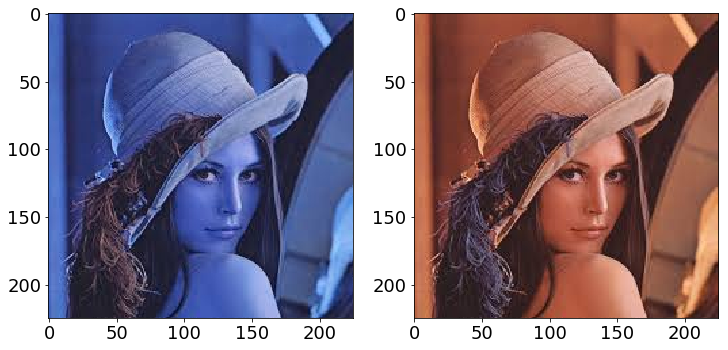

In [3]:
img = cv2.imread('lena.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(img)
plt.subplot(122); plt.imshow(rgb)

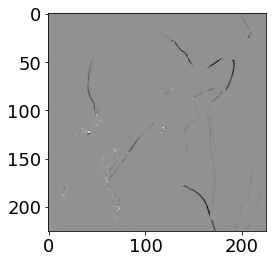

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
plt.imshow(corners, cmap='gray')

(238, 128)
(351, 64)
(374, 32)


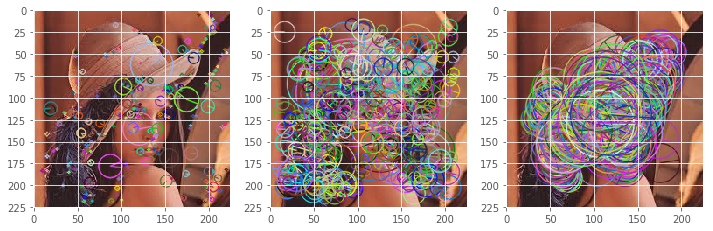

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 12))
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img, None)
print(des.shape)
img_kp = np.zeros_like(img)
img_kp1 = cv2.drawKeypoints(rgb, kp, img_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

sift = cv2.xfeatures2d.SURF_create()
kp, des =sift.detectAndCompute(img, None)
print(des.shape)
img_kp = np.zeros_like(img)
img_kp2 = cv2.drawKeypoints(rgb, kp, img_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

sift = cv2.ORB_create()
kp, des =sift.detectAndCompute(img, None)
print(des.shape)
img_kp = np.zeros_like(img)
img_kp3 = cv2.drawKeypoints(rgb, kp, img_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(131); plt.imshow(img_kp1)
plt.subplot(132); plt.imshow(img_kp2)
plt.subplot(133); plt.imshow(img_kp3)

In [18]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy')

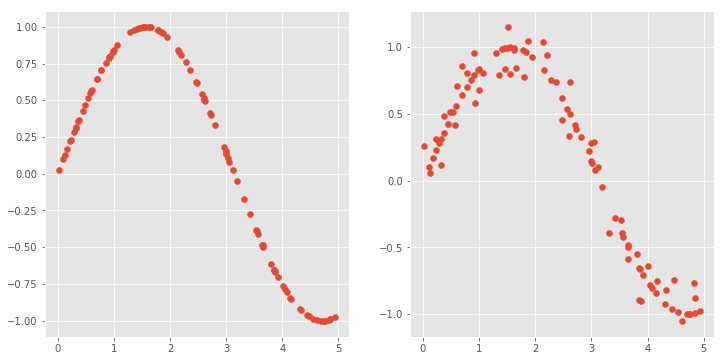

In [37]:
rng = np.random.RandomState(42)
X = np.sort(5*rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()

plt.figure(figsize=(12,6))
plt.subplot(121); plt.scatter(X, y)

y[::2] += 0.5*(0.5-rng.rand(50))
plt.subplot(122); plt.scatter(X, y)

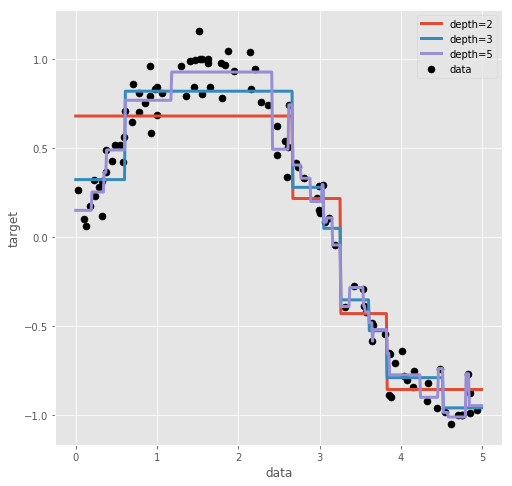

In [49]:
X_test = np.arange(0.0, 5.0, 0.01).reshape(-1,1)
plt.figure(figsize=(8,8))
plt.scatter(X, y, c='k', s=50, label='data')
for d in [2,3,5]:
    rg = tree.DecisionTreeRegressor(max_depth=d, random_state=42)
    rg.fit(X, y)
    #print(rg)
    y1 = rg.predict(X_test)    
    plt.plot(X_test, y1, label='depth={}'.format(d), linewidth=3)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()